# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [2]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# print the number of observations/rows and features/columns in the dataset contain in iris
print(f"The Iris dataset contains {iris_df.shape[0]} observations/rows and {iris_df.shape[1]} features/columns")

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
The Iris dataset contains 150 observatio

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


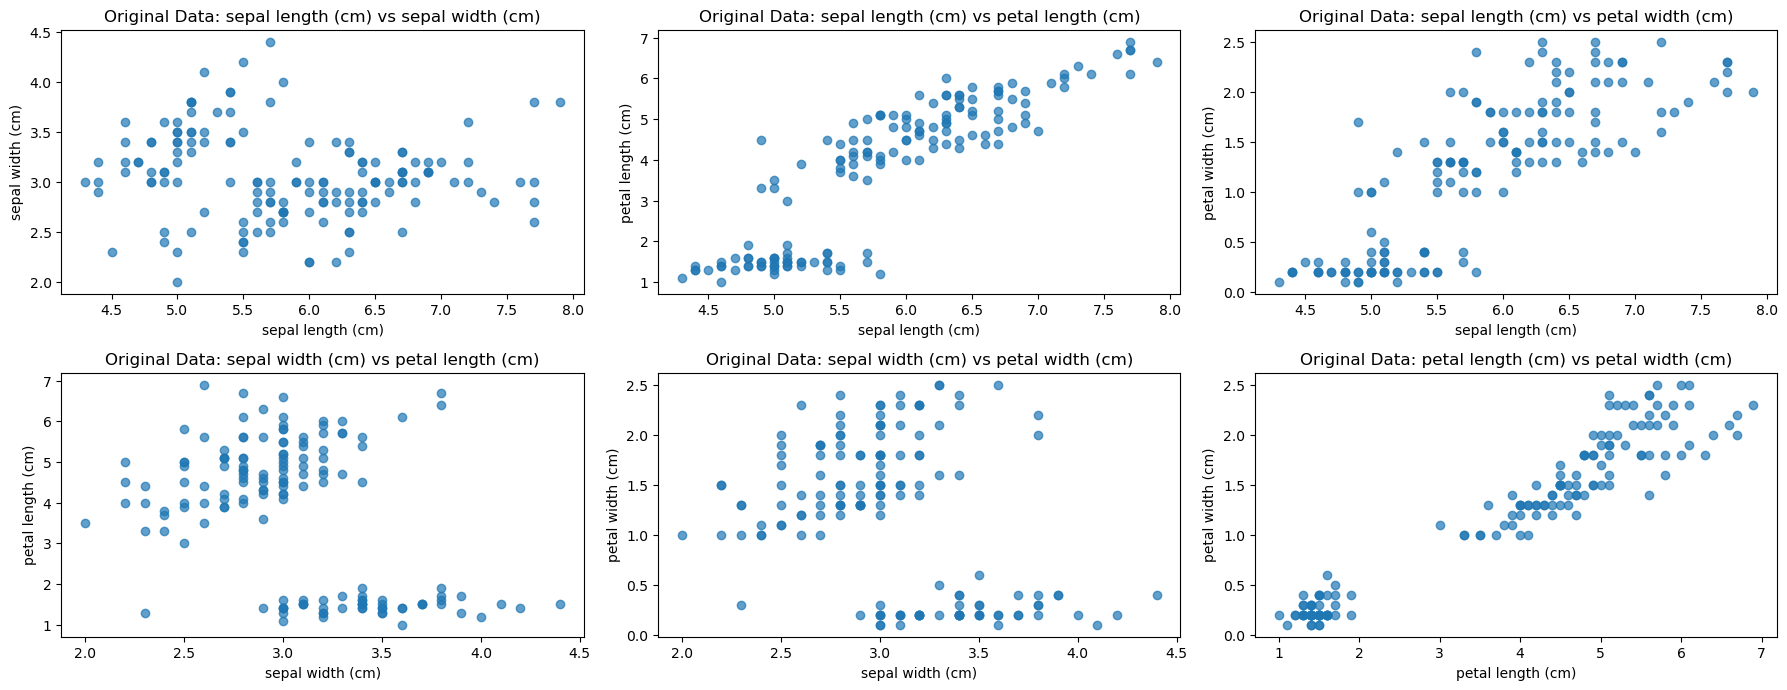

In [3]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(18, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> **Petal Length vs Petal Width** shows a *strong positive correlation* and clear separations between clusters, likely representing different species. -- best pair for distinguishing species, and makes this pair a strong candidate for classification tasks.

> **Petal Length vs Sepal Length** has a *strong positive correlation*, also shows less separation than *Petal Length vs Petal Width* with some overlap on sepal length between 5-6cm. - another useful pair for distinguishing species, and provides good separation especially when combined with other features.

> **Sepal Length vs Petal Width** has a *weaker positive correlation* compare to *Petal Length vs Sepal Length*, also shows less separation than *Petal Length vs Petal Width* with some overlap on sepal length between 5-6cm.

> **Sepal Width vs Sepal Length** has a *much weaker postive correlation* ccompare to *Petal Length vs Sepal Length* and *Sepal Length vs Petal Width*, with significant overlap on sepal features.

> **Petal Length vs Sepal Width** and **Petal Width vs Sepal Width** has similar correlations, they both show more overlap on sepal width less than 4cm.

#### **Question 3:** 
#### Data cleaning

In [4]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> **Standardizing** our data prior to clustering ensures that all features contribute equally to the distance calculations, preventing any single feature from dominating the results due to its scale.

> **Implications of using unstandardized data:** 
> - **Biased Clusters:** When features are not standardized, features with larger magnitudes will disproportionately affect cluster assignments. For example, if sepal length has much larger values than petal width, clusters may be formed primarily based on the differences in sepal length, ignoring other important features.
> - **Misleading Results:** Clusters may not represent the true structure of the data. For instance, points that should be in the same cluster (based on all features) might be incorrectly separated due to the dominance of one unstandardized feature.
> - **Slower or Failed Convergence:** K-Means might converge more slowly or even fail to find meaningful clusters because the centroids will keep shifting toward the larger-scale features. This can result in suboptimal clustering, with centroids not properly capturing the underlying patterns.

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

c:\Users\sijia\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


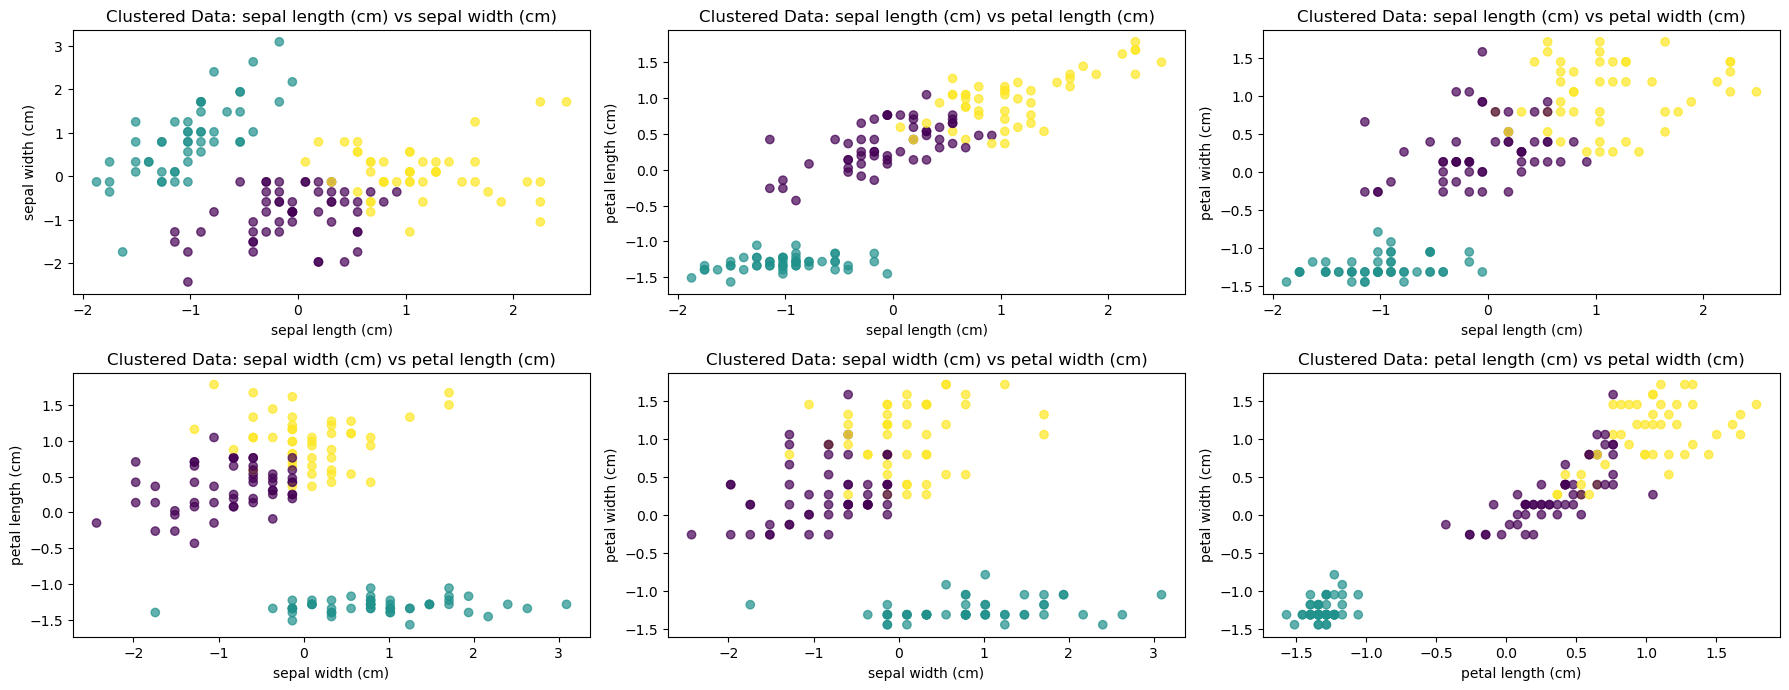

In [5]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(scaled_iris_df)

# Create a copy of the DataFrame for clustering and modification
clustered_iris_data = scaled_iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].copy()

# Add cluster labels to the copied DataFrame
clustered_iris_data['Cluster'] = clusters.labels_

# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, 
                   feature_names, 
                   color_labels=clustered_iris_data['Cluster'], 
                   title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> The **Elbow Method** helps to find the optimal value of k (the number of clusters) by analyzing the Within-Cluster Sum of Squares (WCSS) or inertia, which is the sum of squared distances between each point and its assigned cluster centroid.

> **Why is the Elbow Method Helpful?**
> - **Visual Aid:** It provides a clear, visual way to determine the optimal number of clusters by showing where increasing the number of clusters no longer provides a substantial benefit.
> - **Balance:** The method balances minimizing WCSS (which would decrease with more clusters) and keeping the number of clusters reasonably small to avoid overfitting and increasing complexity.

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [6]:
# Calculate and return the average petal width from the "sepal width (cm)" column in the clustered_iris_data dataset
mean_petal_width = clustered_iris_data['sepal width (cm)'].mean()


# Set the random seed to 123 for reproducibility
np.random.seed(123)

# one sample
one_sample = clustered_iris_data.sample(n=40)

# Create a bootstrap sample from one_sample by sampling 100% of the rows (frac=1) with replacement.
## boot1 is the resulting bootstrap sample, where some rows may appear multiple times, and others may not appear at all.
boot1 = one_sample.sample(frac=1, replace=True)

# Initialize an empty list to store the bootstrap samples
bootstrap_samples = []

for i in range(10000):
    sample = one_sample.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot10000 = pd.concat(bootstrap_samples)


# Calculate the mean sepal width for each bootstrap sample (replicate)
boot_means = boot10000.groupby('replicate')['sepal width (cm)'].mean().reset_index(name='mean_sepal_width')


# Calculate the 90% confidence interval bounds for the mean sepal width
## lower bound = 5th percentile
lower_bound = boot_means['mean_sepal_width'].quantile(0.05)
## upper bound = 95th percentile
upper_bound = boot_means['mean_sepal_width'].quantile(0.95)


# Display the result
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: -1.8237263551175904e-15
90% Confidence Interval of Mean Petal Width: (-0.17801883257335505, 0.40322800222972716)


In [7]:
#   Check if the mean_petal_width is inside the 90% CI
def is_in_range(number, start, end):
    return start <= number <= end

# Example usage:
number = mean_petal_width
if is_in_range(number, lower_bound, upper_bound):
    print(f"The mean of petal width ({number}) is in the 90% CI = ({lower_bound}, {upper_bound}).")
else:
    print(f"The mean of petal width ({number}) is not in the 90% CI = ({lower_bound}, {upper_bound}).")

The mean of petal width (-1.8237263551175904e-15) is in the 90% CI = (-0.17801883257335505, 0.40322800222972716).


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

> **Bootstrapping** is a resampling technique that allows us to estimate the distribution of a statistic (in this case, the mean of Petal Width) by generating many simulated samples from the original dataset. Each simulated sample (bootstrap sample) is generated by sampling with replacement from the original data.

> By using bootstrapping, we can better understand how robust our estimate of the mean is and how much it could change if the sampling process were repeated multiple times.
> - Estimate the **sampling distribution** of the mean Petal Width without making any parametric assumptions (like normality).
> - Understand how the mean would vary if we were to **repeatedly sample** from the population
> - Provide insight into the **uncertainty** or **variability** of the sample mean, which is particularly useful when we don't have access to the entire population data and only have a single sample.

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> The **confidence interval (CI)** calculated from bootstrap samples gives us a range of plausible values for the true population mean of Petal Width. 
> - In our case, a 90% confidence interval means that we expect the true mean Petal Width to lie within the computed interval in 90% of repeated samples.

> The confidence interval helps us understand:
> - **Variability of the estimate:** It shows how much the mean could vary, reflecting the uncertainty associated with the estimate.
> - **Precision:** A narrow confidence interval indicates a more precise estimate of the mean, while a wide interval suggests more uncertainty and variability in the estimate.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> **Narrow Confidence Interval:**
>  + The 90% confidence interval ranges from 1.098 to 1.302, which is relatively narrow. This indicates that we are fairly confident that the true mean of Petal Width lies within this range.
>  + A narrow confidence interval suggests that the mean estimate is quite precise. There isn’t much variation in the potential values for the population mean, reinforcing the idea that the sample mean is likely close to the true population mean.

> **Bootstrap Mean:**
>   + The mean value of 1.2002 is consistent across the bootstrap samples, further indicating that the estimate is stable.
>   + Since you performed 10,000 bootstrap iterations, the fact that the mean is consistent across these samples suggests that the mean Petal Width does not fluctuate much with different resamples, adding to its reliability.

> **Conclusion:**
> - The narrow spread of the confidence interval and the stable bootstrap mean both suggest that the mean of Petal Width is a stable and reliable estimate.
> - There is little variability in the estimate across resamples, indicating that the sample mean is a good reflection of the population mean.
> - You can be reasonably confident that the true mean of Petal Width lies within the given confidence interval, making this estimate both precise and reliable.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
